In [ ]:
#load packages
import numpy as np
import sklearn.model_selection
import matplotlib.pyplot as plt


In [ ]:
#make helper functions

def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()


In [ ]:
#load data

from mlxtend.data import mnist_data
X, y = mnist_data()


#we just focus on 1's and 0's:
keep=(y==0) | (y==1)
X=X[keep,:]
y=y[keep]

y=np.expand_dims(y,1)

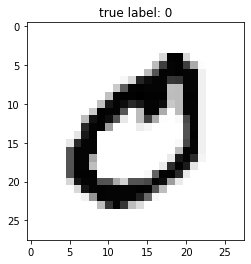

In [ ]:
#inspect data

plot_digit(X, y, 1)


In [ ]:
# create a loss function:
def avrLoss(y,yhat):

  eps=1e-3
  yhat=np.maximum(yhat,eps) #remove 0's
  yhat=np.minimum(yhat,1-eps) #remove 1's

  loss = - (y * np.log(yhat) + (1-y)* np.log (1-yhat))

  return np.mean(loss)

In [ ]:
#test loss function:
#(just run this cell and see what happens)

loss=avrLoss(np.array([0,1,0,1]),np.linspace(.1,.9,4))
assert np.all(loss==0.5543313122608056)

In [ ]:
#create a sigmoid
def sigmoid(x):
  x= np.maximum(x,-700)
  y= 1 / (1 + np.exp(-x))
  return y

In [ ]:
#check sigmoid
#(just run this cell and see what happens)

out=sigmoid(np.array(range(-5,5)))
assert np.all(np.around(out,8)==np.array([0.00669285, 0.01798621, 0.04742587, 0.11920292, 0.26894142, 0.5, 0.73105858, 0.88079708, 0.95257413, 0.98201379]))

In [ ]:
#make test & train data

Xtrain,Xtest,ytrain,ytest=sklearn.model_selection.train_test_split(X,y,test_size=0.3,shuffle=True)

In [ ]:
#INITIATE WEIGHTS AND BIASES (w,b)
w = np.zeros((Xtrain.shape[1],1))
b= 0
nEpoch= 10

accuracy=np.zeros(nEpoch)
trainRate= 0.01

for iTrain in range(nEpoch):

  #CALCULATE a
  a= sigmoid(np.matmul(Xtrain,w)+b)

  #update weights
  wgrad=np.matmul(Xtrain.T,(a-ytrain))/ytrain.size
  bgrad=np.sum(a.T-ytrain)/ytrain.size

  assert(wgrad.shape == w.shape)
  assert(np.isscalar(bgrad))

  w-=wgrad*trainRate
  b-=bgrad*trainRate

  #calculate loss & accuracy

  loss= avrLoss(ytrain, a)

  yhat=a>.5

  accuracy[iTrain]=np.mean(yhat==ytrain)

  if np.mod(iTrain,10)==0:
    print(iTrain,loss,accuracy[iTrain])

Y_prediction_test = sigmoid(np.matmul(Xtest,w)+b)>0.5
Y_prediction_train = sigmoid(np.matmul(Xtrain,w)+b)>0.5

print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - ytrain)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - ytest)) * 100))

0 0.6931471805599454 0.4928571428571429
train accuracy: 99.57142857142857 %
test accuracy: 99.33333333333333 %


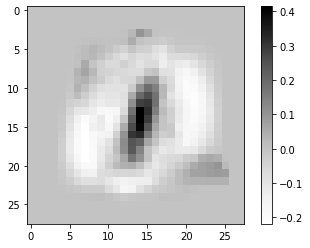

In [ ]:
#see what the network does:

img = w.reshape(28,28)
h=plt.imshow(img, cmap='Greys',  interpolation='nearest')
plt.colorbar(h)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train accuracy:  1.0
Test accuracy:  1.0


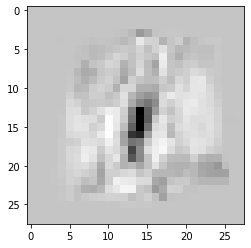

In [ ]:
#commpare with scikit-learn:

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(Xtrain, ytrain)

clf.predict(X)
print('Train accuracy: ',clf.score(Xtrain, ytrain))
print('Test accuracy: ',clf.score(Xtest, ytest))

img = (clf.coef_).reshape(28,28)
plt.imshow(img, cmap='Greys',  interpolation='nearest')
plt.show()